Geothermal machine learning analysis: Great Basin 
---

This notebook is a part of the GeoThermalCloud.jl: GeoThermal Cloud for Machine Learning.

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../../logos/geothermalcloud-small.png" alt="geothermalcloud" width=25%  max-width=125px;/>
</div>

Machine learning analyses are performed using the **SmartTensors** machine learning framework.

<div style="text-align: left; padding-bottom: 30px;">
	<img src="../../logos/SmartTensorsNewSmaller.png" alt="SmartTensors" width=25%  max-width=125px;/>
</div>

This notebook demonstrates how the **NMFk** module of **SmartTensors** can be applied to perform unsupervised geothermal machine-learning analyses.

<div style="text-align: left; padding-bottom: 30px;">
	<img src="../../logos/nmfk-logo.png" alt="nmfk" width=25%  max-width=125px;/>
</div>

More information on how the ML results are interpreted to provide geothermal insights is discussed in our research paper.

## Introduction

- The Great Basin is the largest area of contiguous endorheic watersheds in North America
- It spans nearly all of Nevada, much of Oregon and Utah, and portions of California, Idaho, Wyoming, and Baja California, Mexico
- The Great Basin includes multiple geothermal reservoirs ranging from low- to high-temperature
- The Great Basin has huge potential geothermal potential 
- Further explorations requires an understanding of the local/regional as well as spatial/temporal patterns in various geothermal-related attributes  
- Here, we apply our unsupervised machine learning method **NMFk** to analyze the available geothermal and geochemical data to understand better the spatial distribution of the hydrothermal resources
- Our study area (below) includes 14,258 data points


<div style="text-align: left; padding-bottom: 30px; padding-top: 30px;">
	<img src="../img/greatbasin_data_locs_alt.png" alt="greatbasin_data_locs_alt" width=50%  max-width=225px;/>
</div>

## Import required libraries for this work

If **NMFk** is not installed, first execute in the Julia REPL `import Pkg; Pkg.add("NMFk"); Pkg.add("DelimitedFiles"); Pkg.add("JLD"); Pkg.add("Gadfly"); Pkg.add("Cairo"); Pkg.add("Fontconfig"); Pkg.add("Mads"); Pkg.add("Kriging")`.

In [1]:
import Cairo
import NMFk
import DelimitedFiles
import JLD
import Gadfly
import Fontconfig
import Mads
import Kriging
import Revise

┌ Info: Precompiling NMFk [e40cd9e2-a1df-5d90-a1fa-603fdc3dbdd8]
└ @ Base loading.jl:1317


Mads: Model Analysis & Decision Support
====

    ___      ____            ____    ____              ______
   /   \    /    \          /    |  |    \            /  __  \
  |     \  /     |         /     |  |     \          /  /  \__\
  |  |\  \/  /|  |        /      |  |      \        |  |
  |  | \    / |  |       /  /|   |  |   |\  \        \  \______.
  |  |  \__/  |  |      /  / |   |  |   | \  \        \_______  \
  |  |        |  |     /  /  |   |  |   |  \  \               \  \
  |  |        |  |    /  /===|   |  |   |___\  \    __.        |  |
  |  |        |  |   /  /    |   |  |           \   \  \______/  /
  |__|        |__|  /__/     |___|  |____________\   \__________/

MADS is an integrated high-performance computational framework for data- and model-based analyses.
MADS can perform: Sensitivity Analysis, Parameter Estimation, Model Inversion and Calibration, Uncertainty Quantification, Model Selection and Model Averaging, Model Reduction and Surrogate Modeling, Machine L

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
[ Info: Module BIGUQ is not available!


NMFk: Nonnegative Matrix Factorization + k-means clustering and physics constraints
====

  _     _   _      _   _______   _
 |  \  | | |  \  /  | |  _____| | |  _
 | . \ | | | . \/ . | | |___    | | / /
 | |\ \| | | |\  /| | |  ___|   | |/ /
 | | \ ' | | | \/ | | | |       |   (
 | |  \  | | |    | | | |       | |\ \
 |_|   \_| |_|    |_| |_|       |_| \_\

NMFk performs unsupervised machine learning based on matrix decomposition coupled with various constraints.
NMFk provides automatic identification of the optimal number of signals (features) present in two-dimensional data arrays (matrices).
NMFk offers visualization, pre-, and post-processing capabilities.


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6297181692748984827\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12440862489099057575\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6297181692748984827\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/vvv/.julia/packages/PyPlot/XHEG0/src/init.jl:118


## Load and pre-process the data

### Setup the working directory containing the Great Basin data

In [2]:
cd("/Users/vvv/Julia/GeoThermalCloud.jl/GreatBasin");

### Load the data file

In [3]:
Xdat, headers = DelimitedFiles.readdlm("data/gb_duplicatedRows.txt", ',', header=true);

### Define names of the data attributes (matrix columns)

In [4]:
attributes = ["Temperature", "Quartz", "Chalcedony", "pH", "TDS", "Al", "B", "Ba", "Be", "Br", "Ca", "Cl", "HCO3", "K", "Li", "Mg", "Na", "δO18"]
attributes_long = ["Temperature (C)", "GTM quartz (C)", "GTM chalcedony (C)", "pH ()", "TDS (ppm)", "Al (ppm)", "B (ppm)", "Ba (ppm)", "Be (ppm)", "Br (ppm)", "Ca (ppm)", "Cl (ppm)", "HCO3 (ppm)", "K (ppm)", "Li (ppm)", "Mg (ppm)", "Na (ppm)", "δO18 (‰)"];

Short attribute names are used for coding.

Long attribute names are used for plotting and visualization.

### Define location coordinates

In [5]:
xcoord = Array{Float32}(Xdat[:, 2])
ycoord = Array{Float32}(Xdat[:, 1]);

### Pre-processing

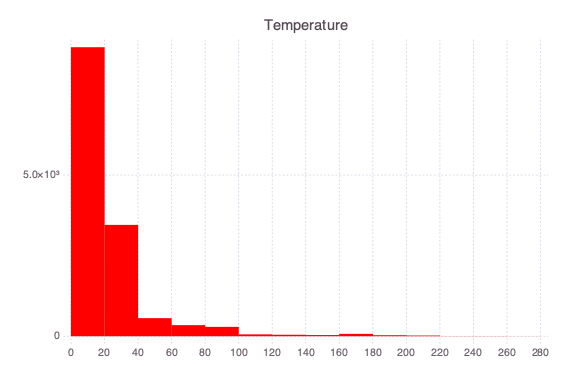

┌ Info: Temperature
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


Temperature: Min 0.1 Max 275.0 StdDev 25.12217 Skewness 4.087667 Count 13894

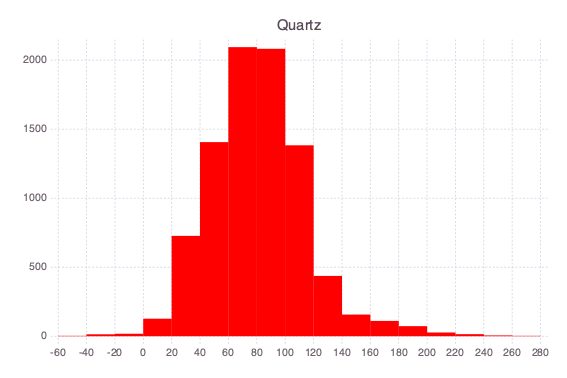

┌ Info: Quartz
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


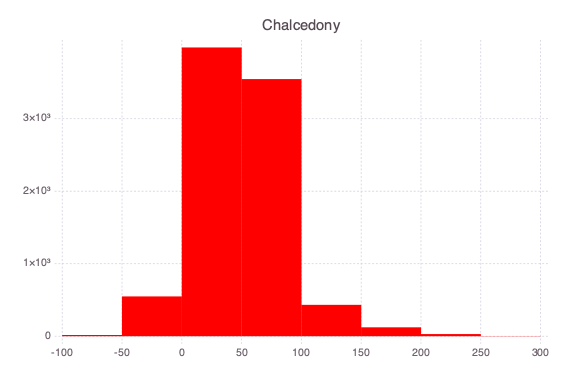

Quartz: Min -50.870045 Max 273.2438 StdDev 34.105637 Skewness 0.6946969 Count 8683


┌ Info: Chalcedony
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


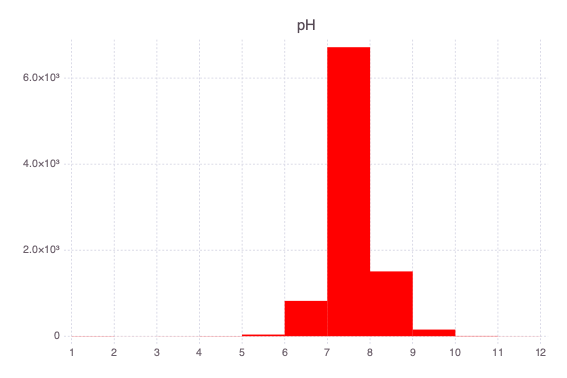

Chalcedony: Min -81.64773 Max 271.23828 StdDev 36.418324 Skewness 0.8679946 Count 8683


┌ Info: pH
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


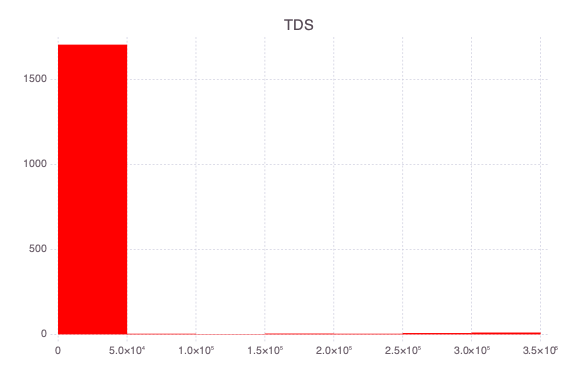

pH: Min 1.0 Max 11.7 StdDev 0.55800503 Skewness -0.5521828 Count 9261


┌ Info: TDS
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


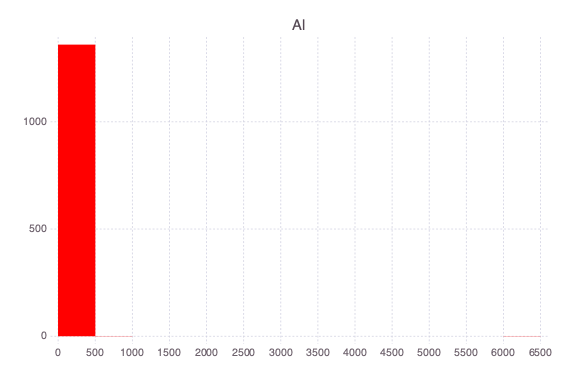

TDS: Min 0.0 Max 329000.0 StdDev 34939.605 Skewness 7.7629066 Count 1740


┌ Info: Al
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


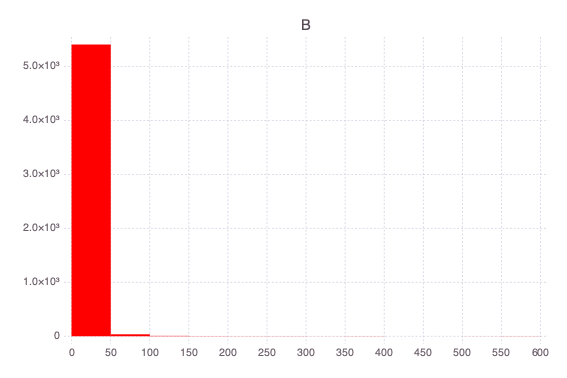

Al: Min 0.0 Max 6400.0 StdDev 175.44391 Skewness 35.600906 Count 1362


┌ Info: B
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


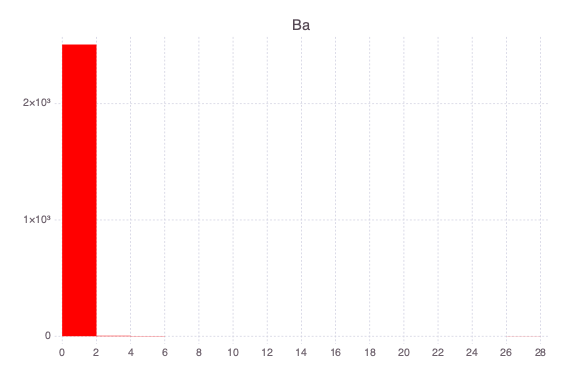

B: Min 0.0 Max 590.0 StdDev 19.017153 Skewness 19.091574 Count 5462


┌ Info: Ba
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


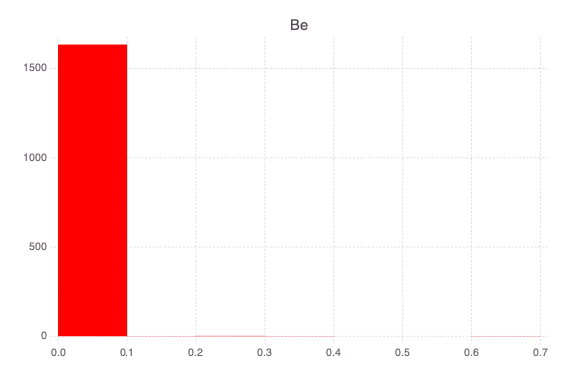

Ba: Min 0.0 Max 27.430857 StdDev 0.58066297 Skewness 41.943157 Count 2516


┌ Info: Be
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


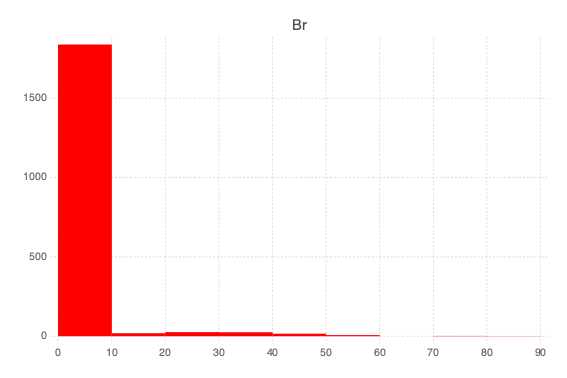

Be: Min 0.0 Max 0.7 StdDev 0.020862982 Skewness 26.046818 Count 1640


┌ Info: Br
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


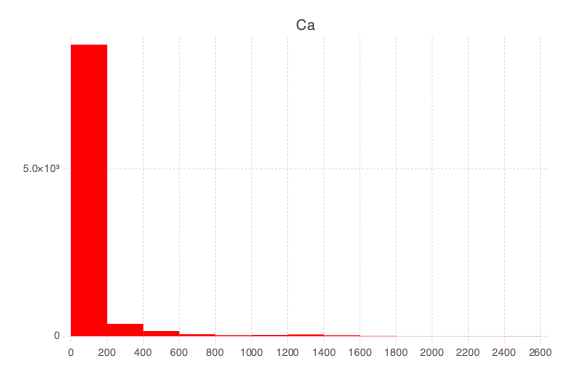

Br: Min 0.0 Max 84.0 StdDev 7.721104 Skewness 5.398518 Count 1935


┌ Info: Ca
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


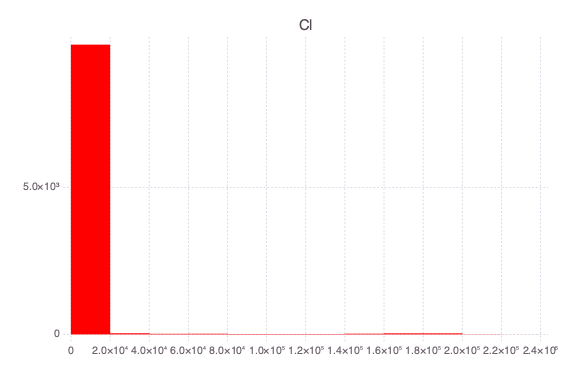

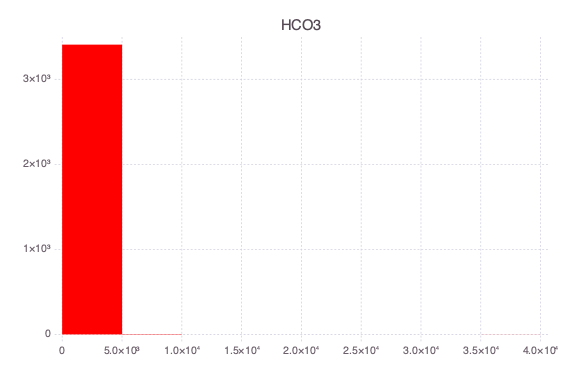

Ca: Min 0.0 Max 2566.6667 StdDev 191.38284 Skewness 5.880362 Count 9468
Cl: Min 0.0 Max 240000.0 StdDev 19115.326 Skewness 8.088112 Count 10091


┌ Info: Cl
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: HCO3
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


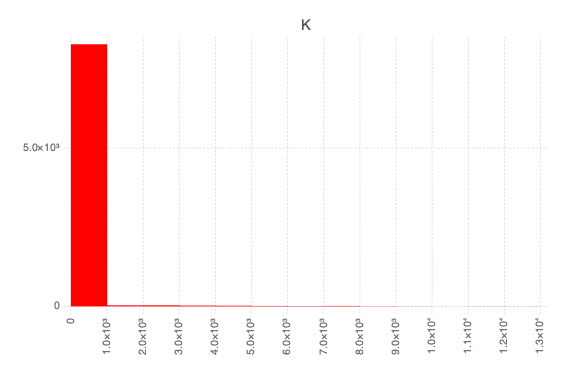

HCO3: Min 0.0 Max 37000.0 StdDev 740.00256 Skewness 37.66232 Count 3413


┌ Info: K
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


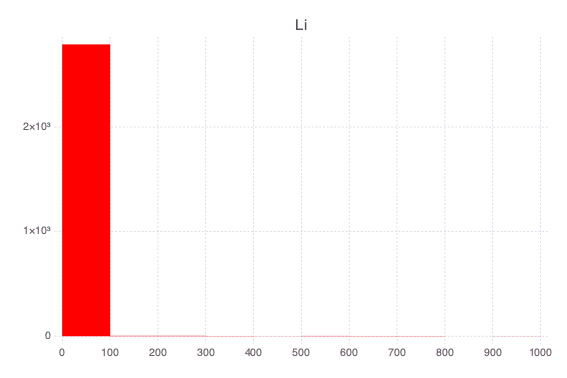

K: Min 0.0 Max 13000.0 StdDev 692.70734 Skewness 9.866844 Count 8446


┌ Info: Li
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


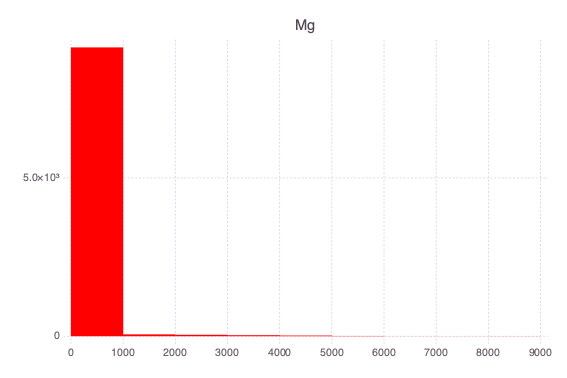

Li: Min 0.0 Max 970.0 StdDev 41.178646 Skewness 15.181558 Count 2809


┌ Info: Mg
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


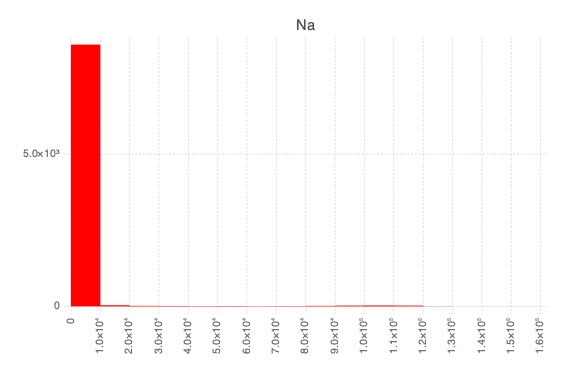

Mg: Min 0.0 Max 8500.0 StdDev 454.54953 Skewness 9.703973 Count 9296


┌ Info: Na
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


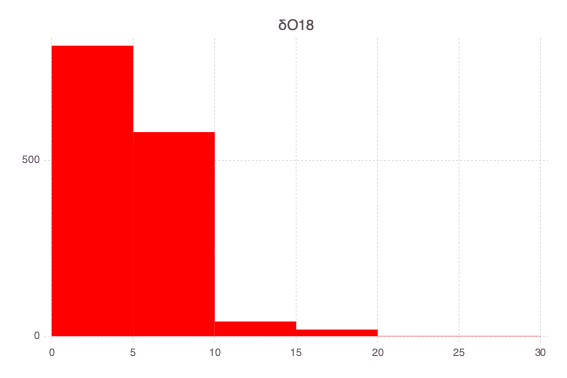

Na: Min 0.0 Max 160000.0 StdDev 12159.811 Skewness 7.597518 Count 8814
δO18: Min 0.79999924 Max 27.85 StdDev 2.772077 Skewness 2.0067368 Count 1471
Name Min Max StdDev Count (non-NaN's)
Temperature 0.1 275.0 25.12217 4.087667 13894
Quartz -50.870045 273.2438 34.105637 0.6946969 8683
Chalcedony -81.64773 271.23828 36.418324 0.8679946 8683
pH 1.0 11.7 0.55800503 -0.5521828 9261
TDS 0.0 329000.0 34939.605 7.7629066 1740
Al 0.0 6400.0 175.44391 35.600906 1362
B 0.0 590.0 19.017153 19.091574 5462
Ba 0.0 27.430857 0.58066297 41.943157 2516
Be 0.0 0.7 0.020862982 26.046818 1640
Br 0.0 84.0 7.721104 5.398518 1935
Ca 0.0 2566.6667 191.38284 5.880362 9468
Cl 0.0 240000.0 19115.326 8.088112 10091
HCO3 0.0 37000.0 740.00256 37.66232 3413
K 0.0 13000.0 692.70734 9.866844 8446
Li 0.0 970.0 41.178646 15.181558 2809
Mg 0.0 8500.0 454.54953 9.703973 9296
Na 0.0 160000.0 12159.811 7.597518 8814
δO18 0.79999924 27.85 2.772077 2.0067368 1471


┌ Info: δO18
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Attributes
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:70


In [6]:
Xdat[Xdat .== ""] .= NaN
X = convert.(Float32, Xdat[:,3:end])
X[:,16] .= abs.(X[:,16])
X[:,18] .+= 20 # rescale δO18 data (‰)

nattributes = length(attributes)
npoints = size(Xdat, 1)

NMFk.datanalytics(X, attributes; dims=2);

It is important to note that a lot of the attribute data are missing.

![gb_duplicatedRows](../data/gb_duplicatedRows.png)

Close to complete records are available only for `Temperature`.

Data for `TDS`, `Al`, and `δO18` are heavily missing.

Even though the dataset is very sparse, our ML methods can analyze the inputs.

Most of the commonly used ML methods cannot process datasets that are sparse.

Furthermore, different attributes in the Great Basin dataset cover different areas.

This is demonstrated in the maps generated below.

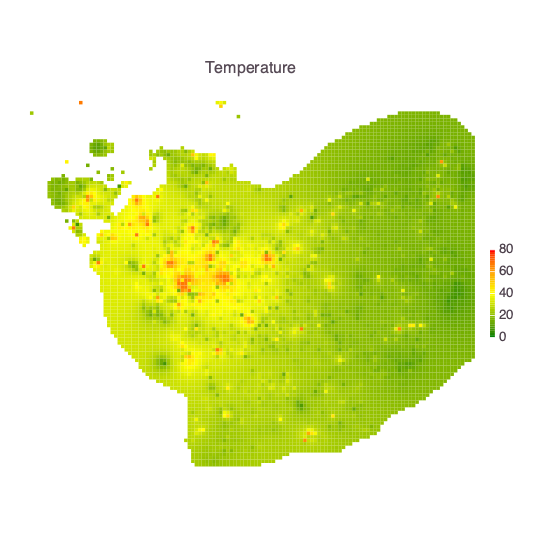

┌ Info: Make dir maps-data
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkIO.jl:114


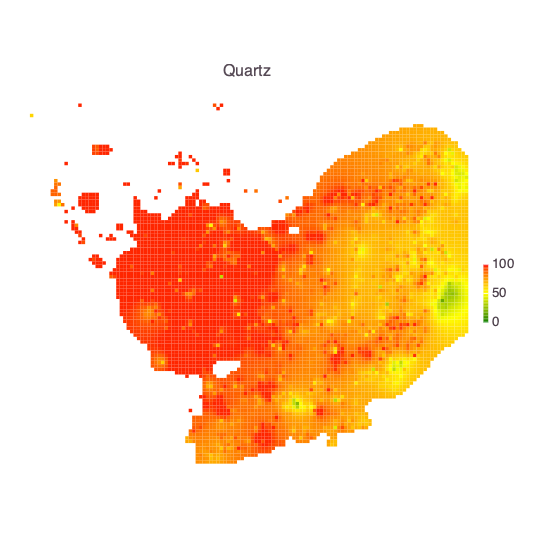

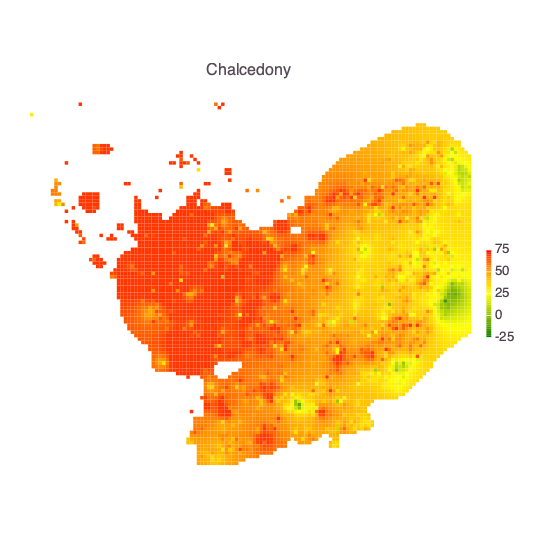

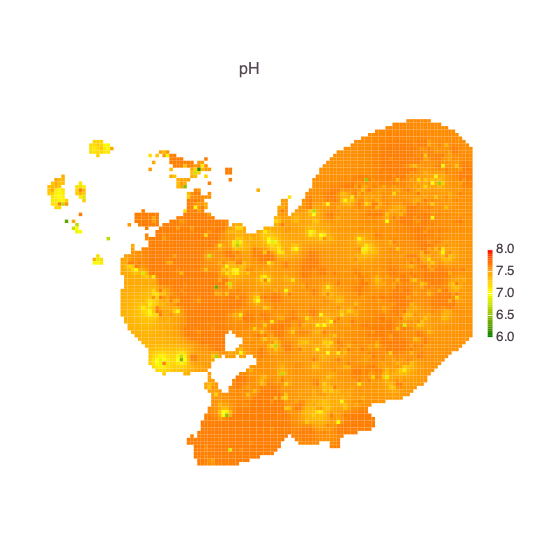

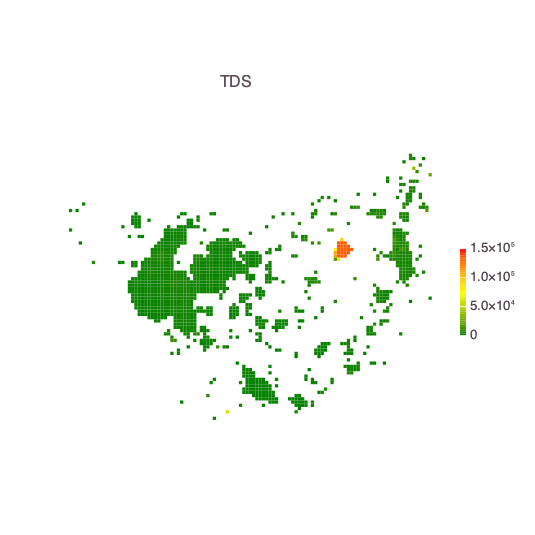

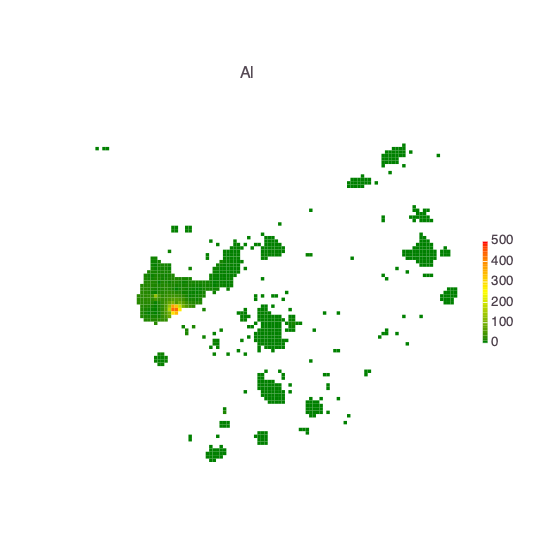

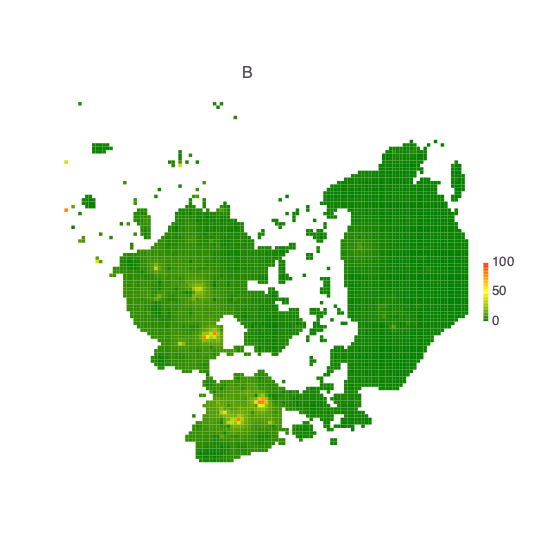

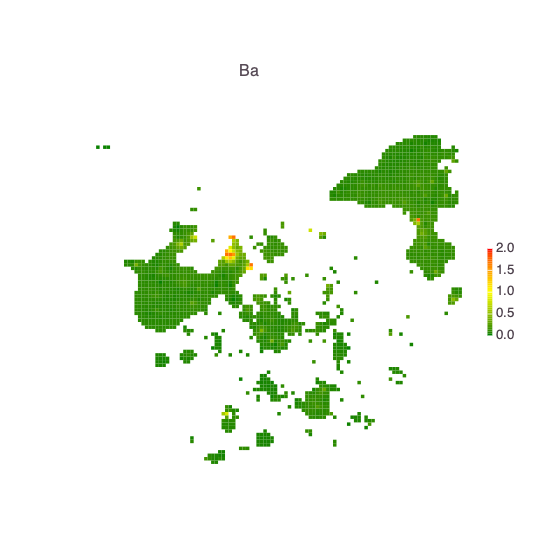

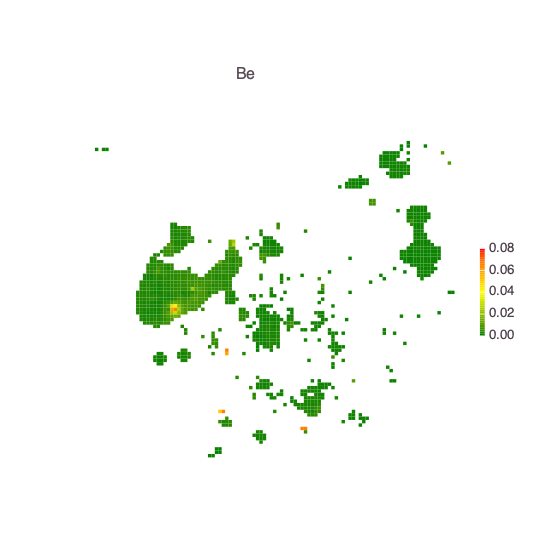

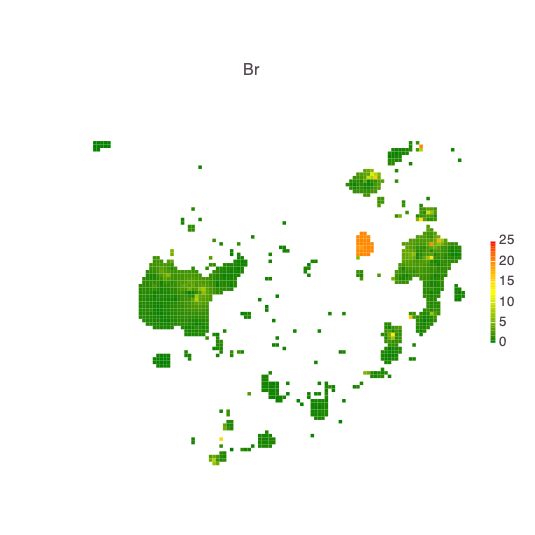

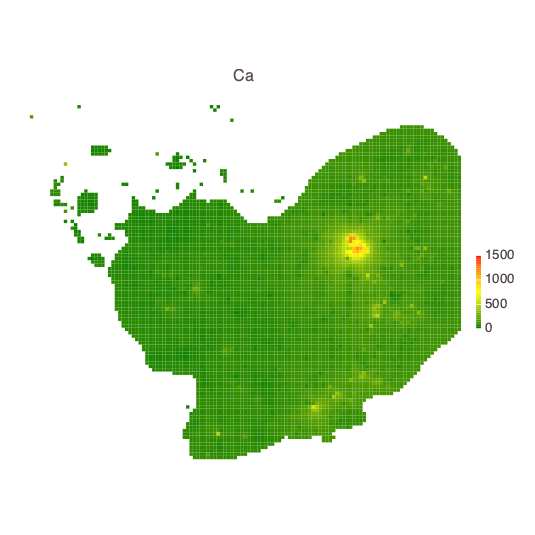

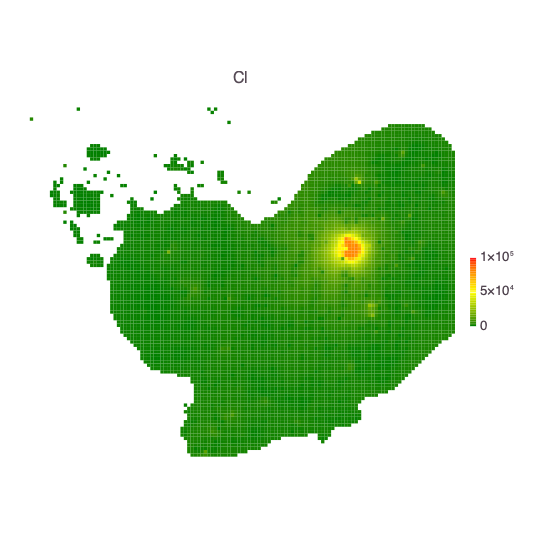

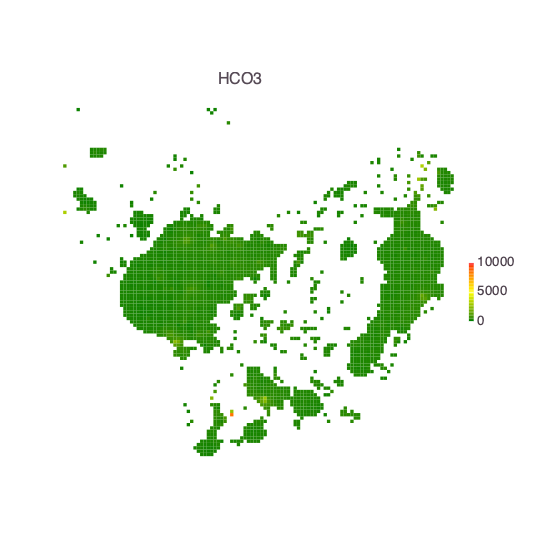

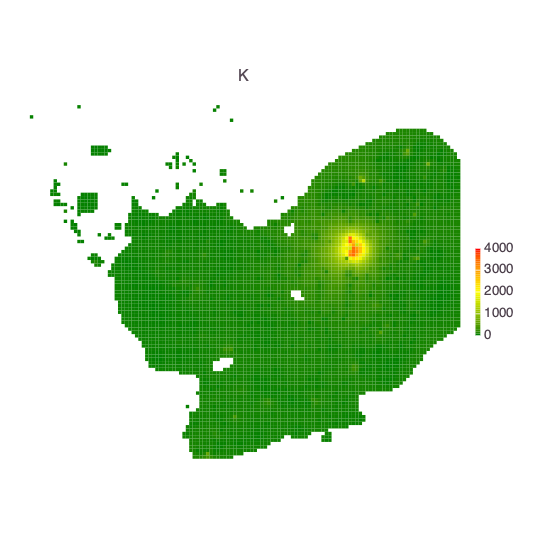

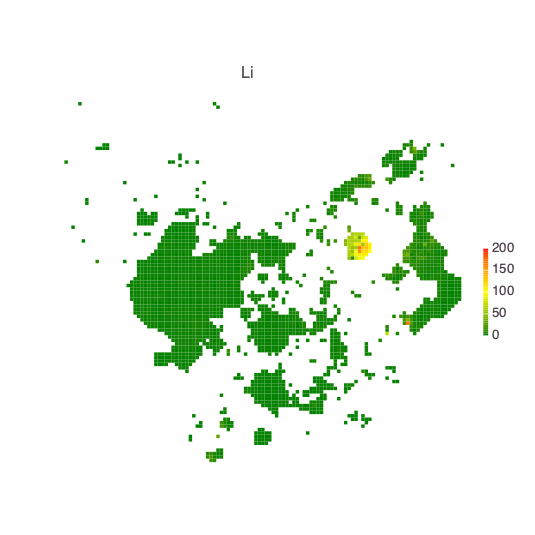

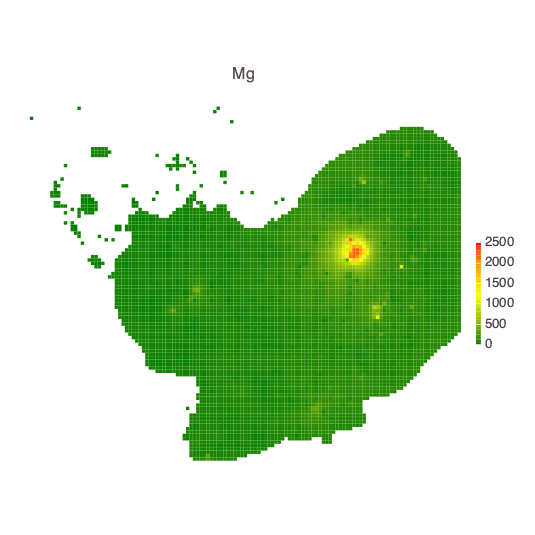

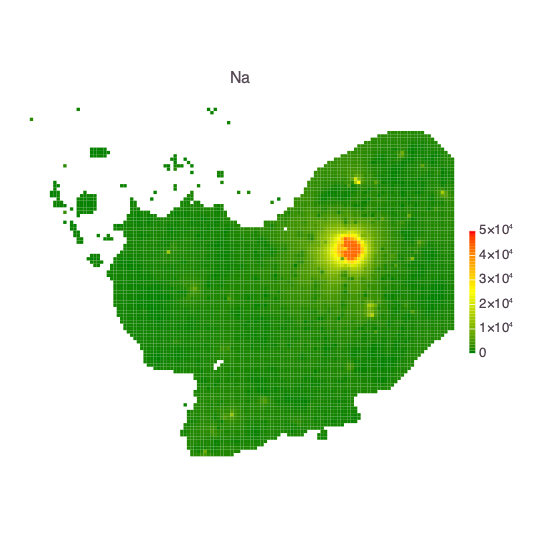

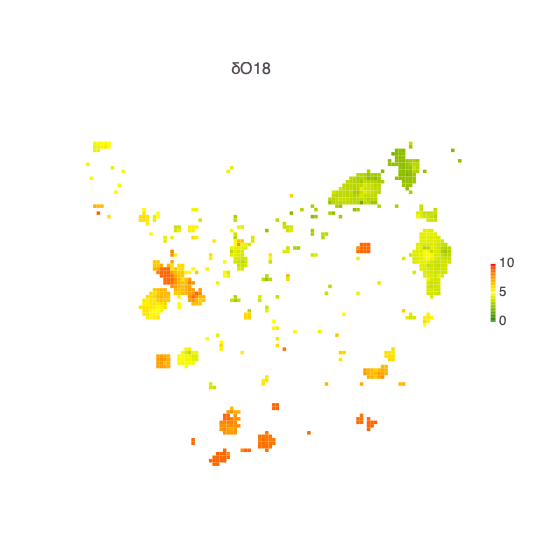

In [7]:
coord = permutedims([xcoord ycoord])

xgrid, ygrid = NMFk.griddata(xcoord, ycoord; stepvalue=0.1)

for i = 1:nattributes
	inversedistancefield = Array{Float64}(undef, length(xgrid), length(ygrid))
	v = X[:,i]
	iz = .!isnan.(v)
	icoord = coord[:,iz]
	v = v[iz]
	for (i, x) in enumerate(xgrid), (j, y) in enumerate(ygrid)
		inversedistancefield[i, j] = Kriging.inversedistance(permutedims([x y]), icoord, v, 2; cutoff=1000)[1]
	end
	imax = NMFk.maximumnan(inversedistancefield)
	imin = NMFk.minimumnan(inversedistancefield)
	NMFk.plotmatrix(rotl90(inversedistancefield); quiet=false, filename="maps-data/Attribute_$(attributes[i])_map_inversedistance.png", title="$(attributes[i])", maxvalue=imin + (imax - imin)/ 2)
end

### Log-transformation

Attribute values are log-transformed to better capture the order of magnitude variability.

All attributes except for `Quartz`, `Chalcedony` and `pH` are log-transformed.

In [8]:
logv = [true, false, false, false,  true, true, true, true, true, true, true, true, true, true, true, true, true, true]
[attributes logv]

18×2 Matrix{Any}:
 "Temperature"   true
 "Quartz"       false
 "Chalcedony"   false
 "pH"           false
 "TDS"           true
 "Al"            true
 "B"             true
 "Ba"            true
 "Be"            true
 "Br"            true
 "Ca"            true
 "Cl"            true
 "HCO3"          true
 "K"             true
 "Li"            true
 "Mg"            true
 "Na"            true
 "δO18"          true

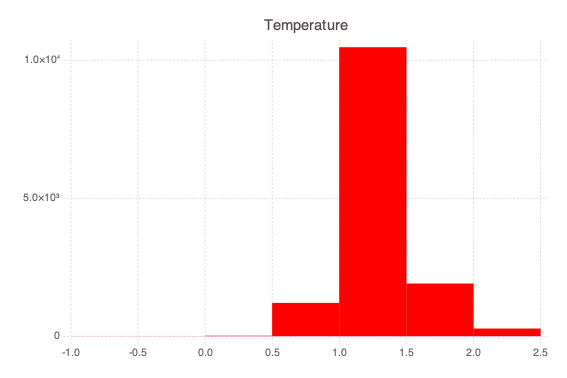

┌ Info: Temperature: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


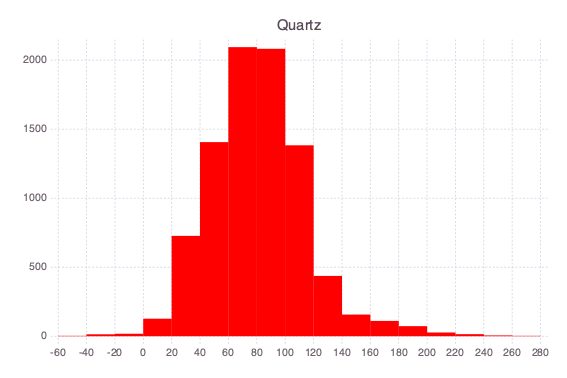

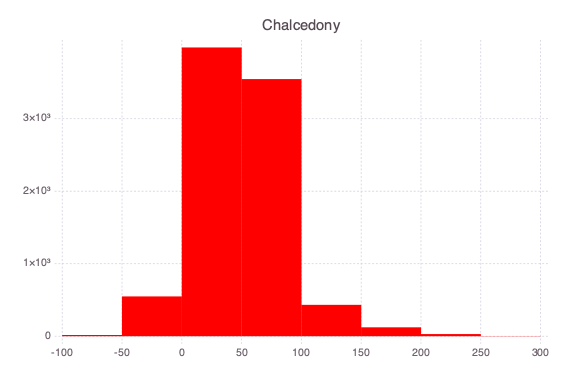

Temperature: Min -1.0 Max 2.4393327 StdDev 0.28062904 Skewness 0.8823397 Count 13894
Quartz: Min -50.870045 Max 273.2438 StdDev 34.105637 Skewness 0.6946969 Count 8683


┌ Info: Quartz
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Chalcedony
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


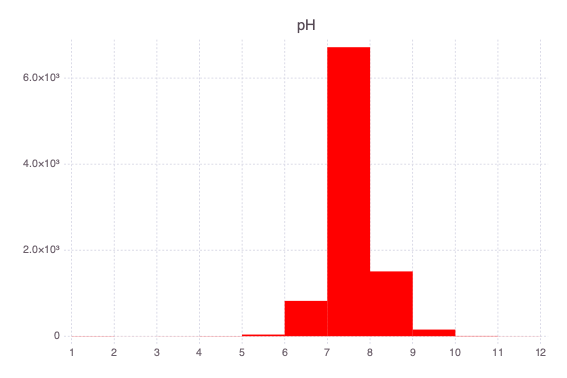

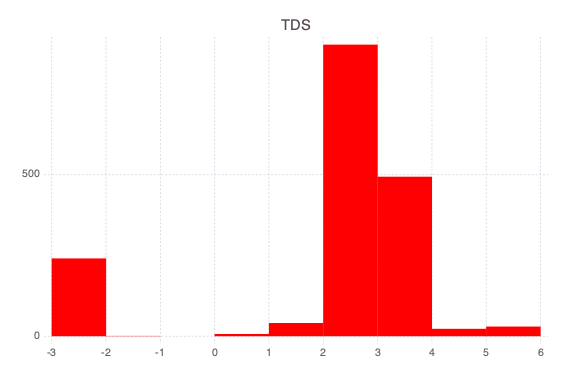

Chalcedony: Min -81.64773 Max 271.23828 StdDev 36.418324 Skewness 0.8679946 Count 8683
pH: Min 1.0 Max 11.7 StdDev 0.55800503 Skewness -0.5521828 Count 9261


┌ Info: pH
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: TDS: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


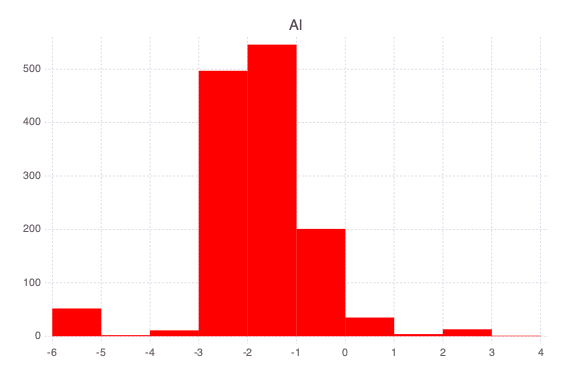

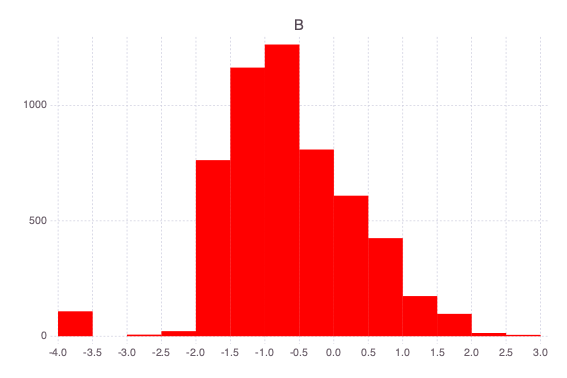

TDS: Min -2.6989698 Max 5.5171957 StdDev 2.0129914 Skewness -1.7111415 Count 1740
Al: Min -5.8860564 Max 3.80618 StdDev 1.2161667 Skewness -0.44271475 Count 1362


┌ Info: Al: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: B: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


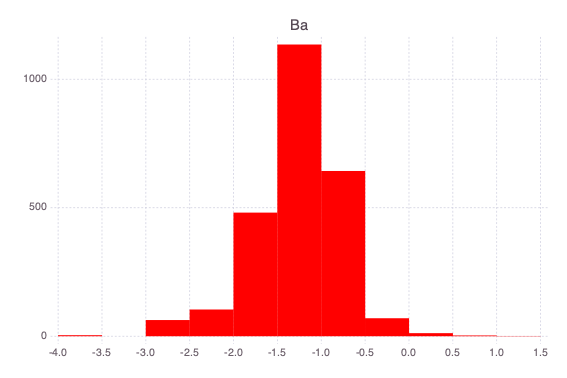

B: Min -4.0 Max 2.770852 StdDev 0.99189556 Skewness -0.15991572 Count 5462


┌ Info: Ba: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


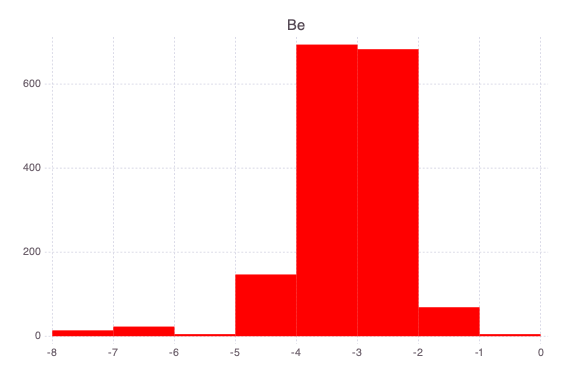

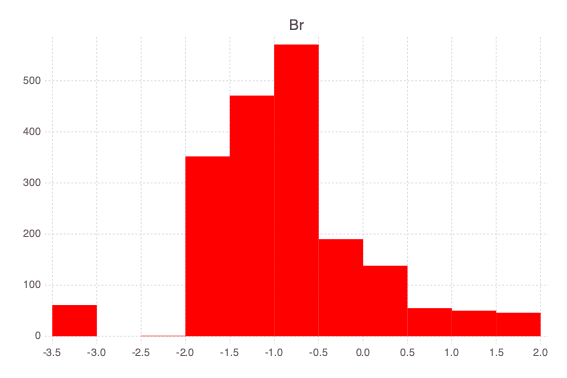

Ba: Min -4.0 Max 1.4382393 StdDev 0.492002 Skewness -0.63361335 Count 2516
Be: Min -8.0 Max -0.15490197 StdDev 0.8196359 Skewness -2.5543597 Count 1640


┌ Info: Be: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Br: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


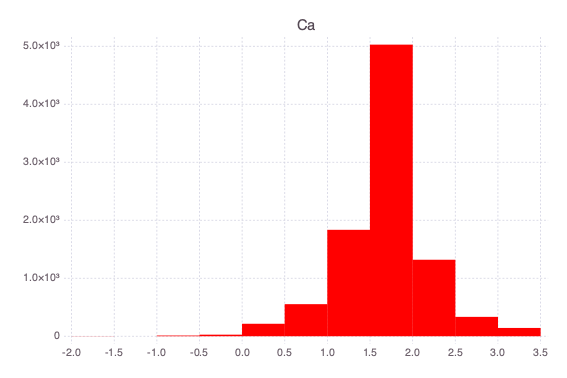

Br: Min -3.102373 Max 1.9242793 StdDev 0.90064573 Skewness 0.497394 Count 1935


┌ Info: Ca: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


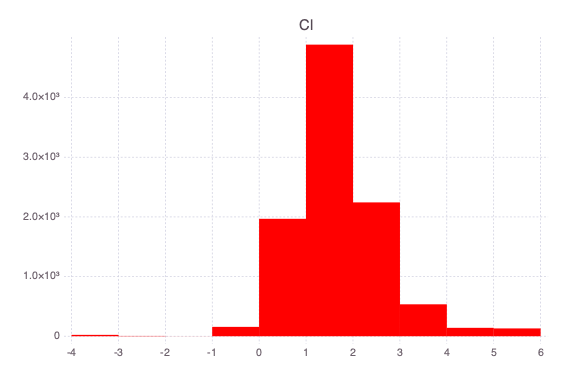

Ca: Min -2.0 Max 3.4093695 StdDev 0.51392627 Skewness -0.4936186 Count 9468


┌ Info: Cl: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


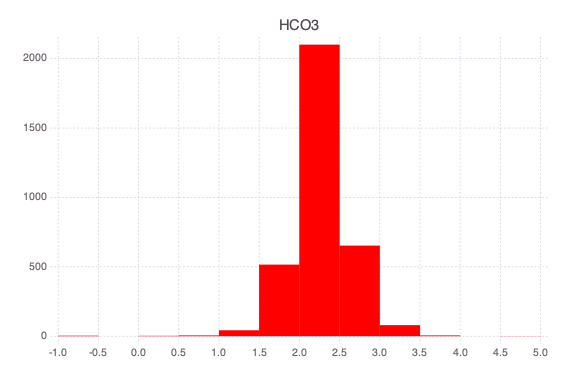

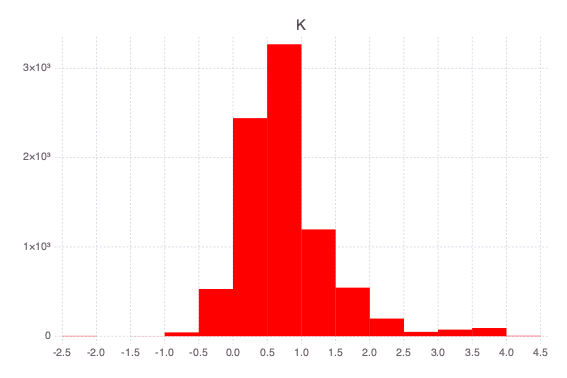

Cl: Min -4.0 Max 5.3802114 StdDev 0.99255455 Skewness 0.45536557 Count 10091
HCO3: Min -1.0 Max 4.5682015 StdDev 0.36140293 Skewness -0.94632554 Count 3413


┌ Info: HCO3: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: K: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


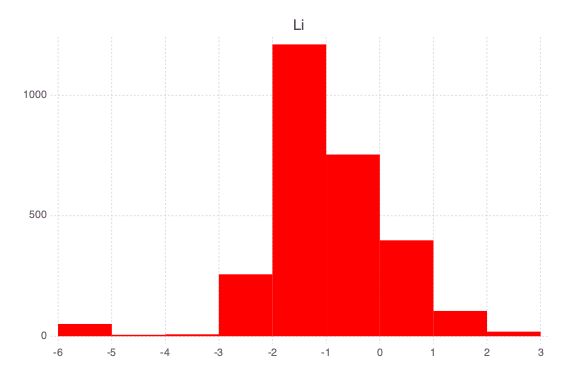

K: Min -2.09691 Max 4.1139436 StdDev 0.686127 Skewness 1.5732428 Count 8446


┌ Info: Li: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


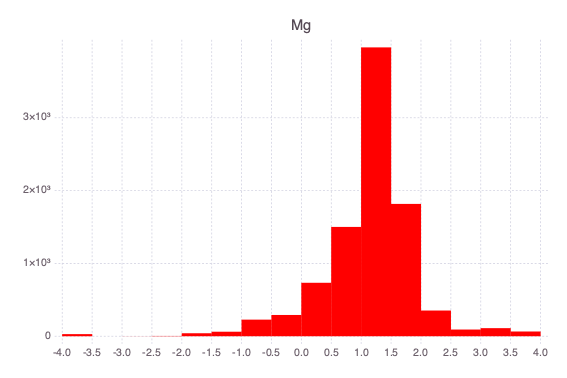

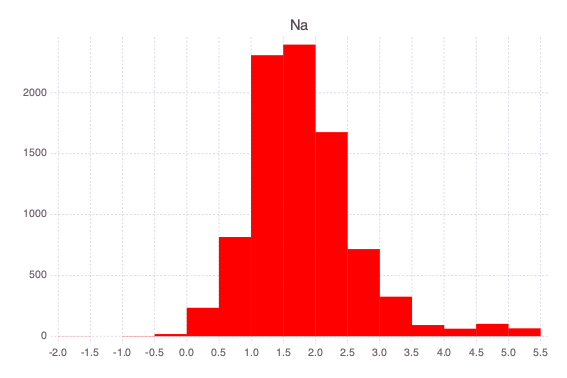

Li: Min -6.0 Max 2.9867718 StdDev 1.2346249 Skewness -0.6840743 Count 2809
Mg: Min -3.69897 Max 3.929419 StdDev 0.79547274 Skewness -1.0883808 Count 9296


┌ Info: Mg: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Na: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


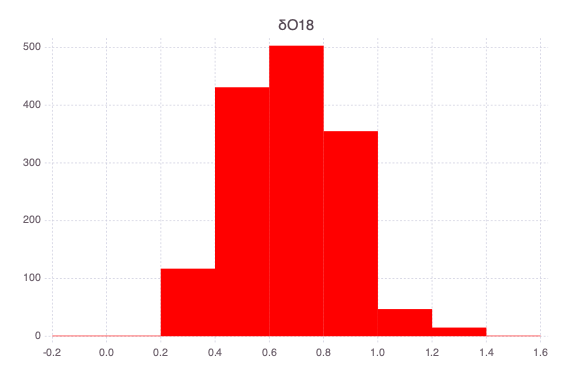

Na: Min -1.6989701 Max 5.20412 StdDev 0.8328025 Skewness 1.1553397 Count 8814
δO18: Min -0.096910425 Max 1.4448252 StdDev 0.20046535 Skewness 0.21996279 Count 1471
Name Min Max StdDev Count (non-NaN's)
Temperature -1.0 2.4393327 0.28062904 0.8823397 13894
Quartz -50.870045 273.2438 34.105637 0.6946969 8683
Chalcedony -81.64773 271.23828 36.418324 0.8679946 8683
pH 1.0 11.7 0.55800503 -0.5521828 9261
TDS -2.6989698 5.5171957 2.0129914 -1.7111415 1740
Al -5.8860564 3.80618 1.2161667 -0.44271475 1362
B -4.0 2.770852 0.99189556 -0.15991572 5462
Ba -4.0 1.4382393 0.492002 -0.63361335 2516
Be -8.0 -0.15490197 0.8196359 -2.5543597 1640
Br -3.102373 1.9242793 0.90064573 0.497394 1935
Ca -2.0 3.4093695 0.51392627 -0.4936186 9468
Cl -4.0 5.3802114 0.99255455 0.45536557 10091
HCO3 -1.0 4.5682015 0.36140293 -0.94632554 3413
K -2.09691 4.1139436 0.686127 1.5732428 8446
Li -6.0 2.9867718 1.2346249 -0.6840743 2809
Mg -3.69897 3.929419 0.79547274 -1.0883808 9296
Na -1.6989701 5.20412 0.8328025 1.15533

┌ Info: δO18: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Attributes
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:70


In [9]:
NMFk.datanalytics(X, attributes; dims=2, logv=logv);

#### Define and normalize the data matrix

In [10]:
Xnl, xlmin, xlmax, zflag = NMFk.normalizematrix_col(X; logv=logv);

### Define a range for the number of signatures to be explored 

In [11]:
nkrange = 2:10;

### Define directory with exsiting model runs

In [12]:
resultdir = "results";

#### Define the number of NMF runs to be executed

The higher the NMF runs, the better.
In addition, convergence has already been explored using different numbers of NMF runs.

In [13]:
nruns = 640;

## Perform ML analyses

The **NMFk** algorithm factorizes the normalized data matrix `Xn` into `W` and `H` matrices.
For more information, check out the [**NMFk** website](https://github.com/SmartTensors/NMFk.jl)

In [14]:
W, H, fitquality, robustness, aic = NMFk.execute(Xnl, nkrange, nruns; cutoff=0.4, resultdir=resultdir, casefilename="nmfk-nl", load=true)
W, H, fitquality, robustness, aic = NMFk.load(nkrange, nruns; cutoff=0.4, resultdir=resultdir, casefilename="nmfk-nl");

Signals:  2 Fit:     490.2203 Silhouette:     0.886031 AIC:    -531856.6
Signals:  3 Fit:     315.1114 Silhouette:     0.498339 AIC:    -551467.8
Signals:  4 Fit:      224.617 Silhouette:  -0.01242121 AIC:      -559810
Signals:  5 Fit:     157.1486 Silhouette:  0.004662591 AIC:    -570187.6
Signals:  6 Fit:     118.4444 Silhouette:   -0.1862046 AIC:    -572450.7
Signals:  7 Fit:      85.8435 Silhouette:  -0.09372894 AIC:    -578982.6
Signals:  8 Fit:      62.9881 Silhouette:    -0.113508 AIC:    -584169.8
Signals:  9 Fit:     45.59955 Silhouette:  -0.05323794 AIC:      -590825
Signals: 10 Fit:     33.40136 Silhouette:  -0.08453866 AIC:    -596199.8
Signals:  2 Fit:     490.2203 Silhouette:     0.886031 AIC:    -531856.6
Signals:  3 Fit:     315.1114 Silhouette:     0.498339 AIC:    -551467.8
Signals:  4 Fit:      224.617 Silhouette:  -0.01242121 AIC:      -559810
Signals:  5 Fit:     157.1486 Silhouette:  0.004662591 AIC:    -570187.6
Signals:  6 Fit:     118.4444 Silhouette:   -0.1862

┌ Info: Results
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:15
┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:20


Signals:  2 Fit:     490.2203 Silhouette:     0.886031 AIC:    -531856.6
Signals:  3 Fit:     315.1114 Silhouette:     0.498339 AIC:    -551467.8
Signals:  4 Fit:      224.617 Silhouette:  -0.01242121 AIC:      -559810
Signals:  5 Fit:     157.1486 Silhouette:  0.004662591 AIC:    -570187.6
Signals:  6 Fit:     118.4444 Silhouette:   -0.1862046 AIC:    -572450.7
Signals:  7 Fit:      85.8435 Silhouette:  -0.09372894 AIC:    -578982.6
Signals:  8 Fit:      62.9881 Silhouette:    -0.113508 AIC:    -584169.8
Signals:  9 Fit:     45.59955 Silhouette:  -0.05323794 AIC:      -590825
Signals: 10 Fit:     33.40136 Silhouette:  -0.08453866 AIC:    -596199.8


┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkIO.jl:30


Here, the **NMFk** results are loaded from a prior ML run.

As seen from the output above, the NMFk analyses identified that the optimal number of geothermal signatures in the dataset **3**.

Solutions with a number of signatures less than **3** are underfitting.

Solutions with a number of signatures greater than **3** are overfitting and unacceptable.

The set of acceptable solutions are defined by the **NMFk** algorithm as follows:

In [15]:
NMFk.getks(nkrange, robustness[nkrange], 0.4)

2-element Vector{Int64}:
 2
 3

The acceptable solutions contain 2 and 3 signatures.

### Post-processing NMFk results

#### Number of signatures

Below is a plot representing solution quality (fit) and silhouette width (robustness) for different numbers of signatures `k`:

In [16]:
resultdirpost = "results-postprocessing-nl-$(nruns)"
figuredirpost = "figures-postprocessing-nl-$(nruns)";

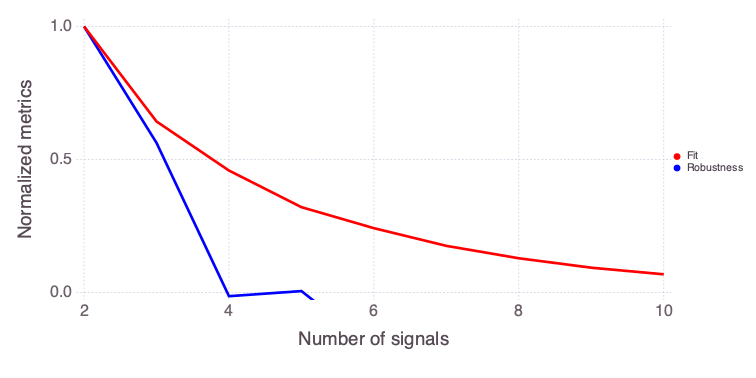

In [17]:
NMFk.plot_feature_selecton(nkrange, fitquality, robustness; figuredir=figuredirpost)

The plot above also demonstrates that the acceptable solutions contain 2 and 3 signatures.
Note, a solution is accepted if the robustness >0.25.

#### Analysis of the optimal solution

The ML solution with the optimal number of signatures (3) is further analyzed as follows:

┌ Info: Number of signals: 2
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:154


Signal importance (high->low): [1, 2]


┌ Info: Attributes (signals=2)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:158
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float32,2},Core.Float32,Core.Int64} not present in workspace; reconstructing
└ @ JLD /Users/vvv/.julia/packages/JLD/iNFfv/src/jld_types.jl:697
┌ Info: Robust k-means analysis results are loaded from file results-postprocessing-nl-640/Hmatrix-2-2_18-1000.jld!
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:67
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: File results-postprocessing-nl-640/Wmatrix-2-2_14258-1000.jld does not exist! Robust k-means analysis will be executed ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:74
┌ Info: Robust k-means analysis results are saved in file results-p

8×2 Matrix{Any}:
 "TDS"   1.0
 "Ca"    0.908188
 "Mg"    0.89703
 "HCO3"  0.69713
 "pH"    0.678937
 "Ba"    0.623199
 "Be"    0.615361
 "Cl"    0.581544

┌ Info: Signal A -> B Count: 10
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:265
┌ Info: Signal A (S1) (k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:282


10×2 Matrix{Any}:
 "B"            1.0
 "Br"           0.960639
 "Quartz"       0.958703
 "Chalcedony"   0.917915
 "Temperature"  0.759815
 "Al"           0.730695
 "Li"           0.703907
 "Na"           0.676424
 "δO18"         0.660136
 "K"            0.58262

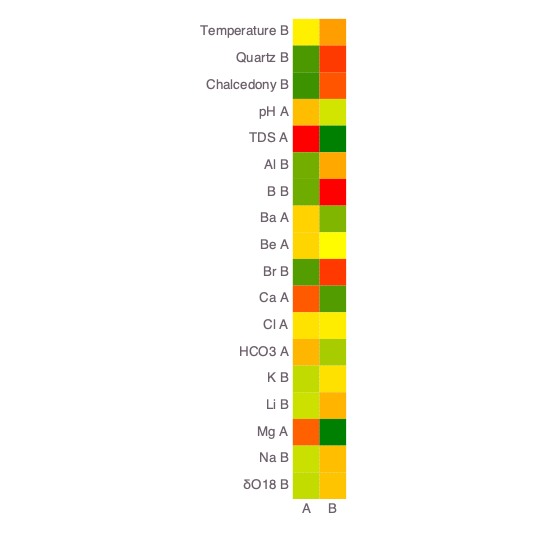

┌ Info: Signal B (S2) (k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:282


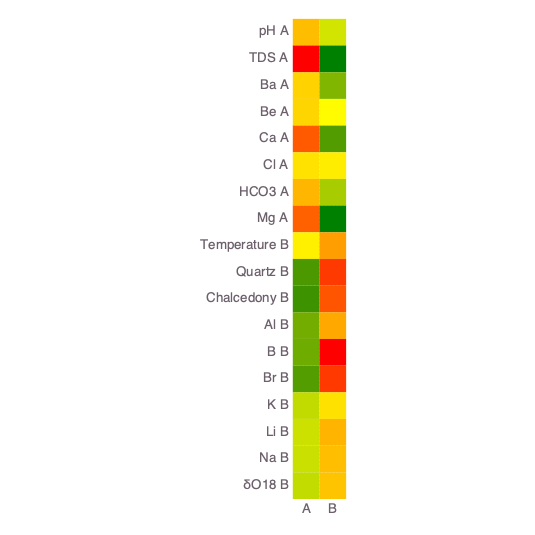

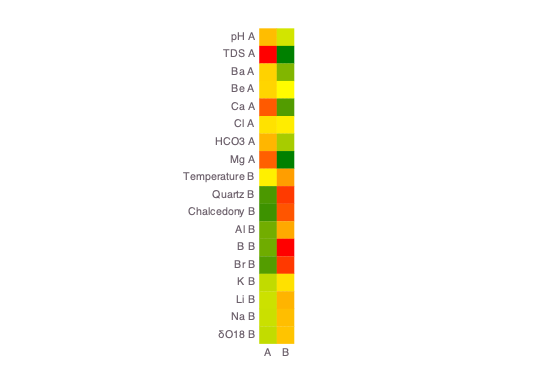

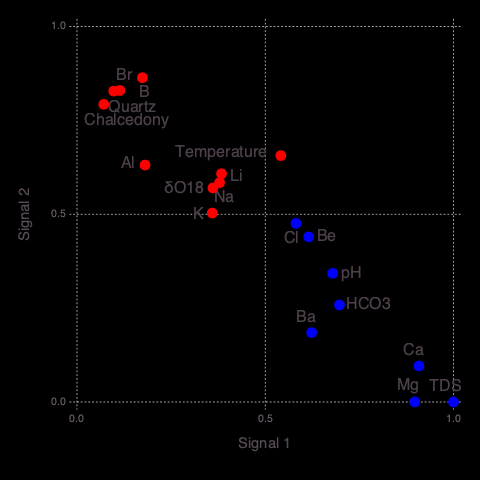

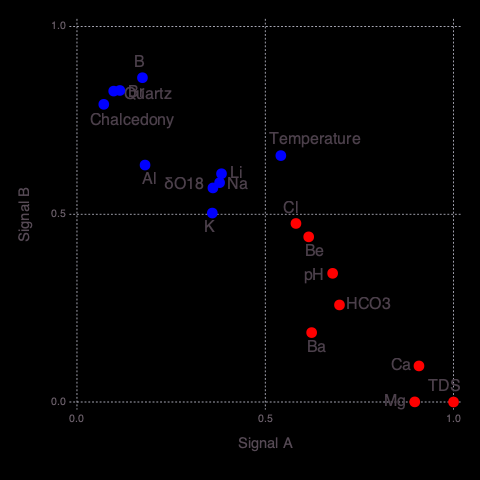

11662×2 Matrix{Any}:
 "11271"  1.0
 "10589"  0.929359
 "11498"  0.91736
 "10127"  0.90625
 "13020"  0.88508
 "11925"  0.881833
 "13551"  0.878259
 "6745"   0.878246
 "6750"   0.865578
 "6752"   0.865472
 "6748"   0.86425
 "6672"   0.860871
 "6743"   0.857552
 ⋮        
 "13228"  0.0
 "13282"  0.0
 "13373"  0.0
 "13389"  0.0
 "13397"  0.0
 "13434"  0.0
 "13439"  0.0
 "13441"  0.0
 "13456"  0.0
 "13460"  0.0
 "13517"  0.0
 "13882"  0.0

2596×2 Matrix{Any}:
 "9946"   1.0
 "9108"   0.999518
 "12933"  0.984034
 "12901"  0.979279
 "10102"  0.974301
 "7816"   0.967731
 "12909"  0.967398
 "11797"  0.95891
 "11830"  0.9533
 "11881"  0.950554
 "12897"  0.949163
 "11848"  0.948021
 "10488"  0.94737
 ⋮        
 "4110"   0.350342
 "529"    0.348303
 "326"    0.344399
 "12473"  0.343731
 "5489"   0.343598
 "8919"   0.337363
 "492"    0.330819
 "10526"  0.32875
 "12260"  0.322862
 "94"     0.319186
 "474"    0.30456
 "470"    0.241611

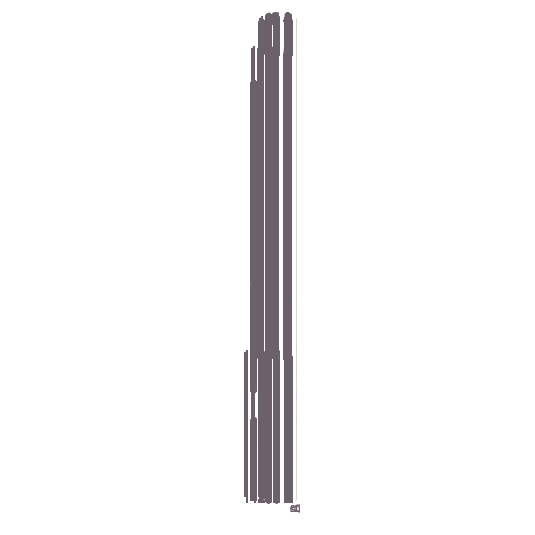

┌ Info: Locations (signals=2)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:340
┌ Info: Signal A (S1) Count: 11662
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:353
┌ Info: Signal B (S2) Count: 2596
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:353
┌ Info: Signal A -> A Count: 11662
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:363
┌ Info: Signal B -> B Count: 2596
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:363
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:378
┌ Info: Signal B (remapped k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:378


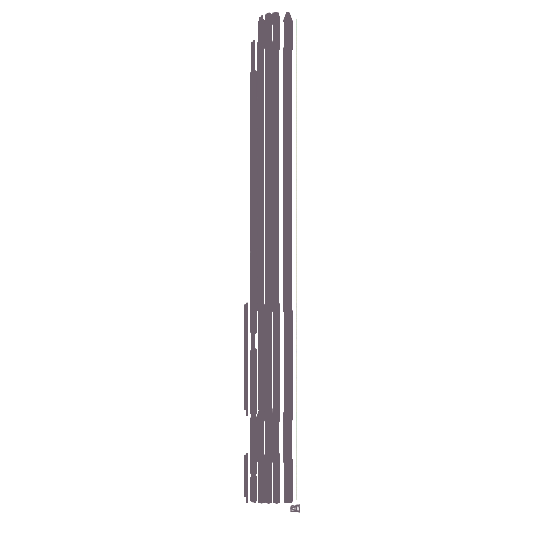

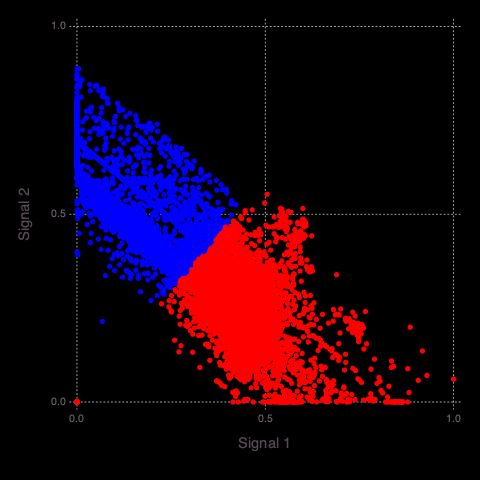

ArgumentError("Distance matrix should be symmetric.")


┌ Warning: Dendogram ploting failed!
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:431


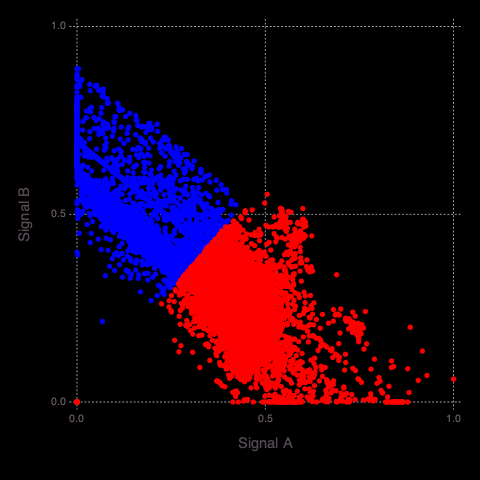

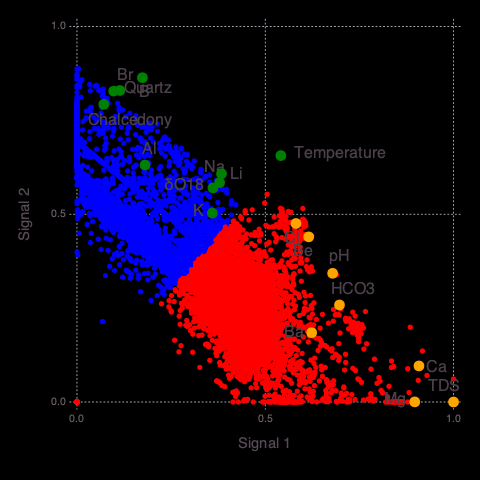

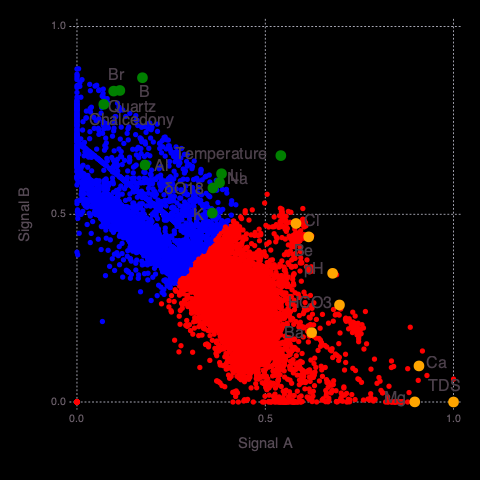

([[1, 2]], [['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'  …  'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A']], [['B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B']])

In [18]:
Sorder, Wclusters, Hclusters = NMFk.clusterresults(NMFk.getk(nkrange, robustness[nkrange]), W, H, string.(collect(1:npoints)), attributes; lon=xcoord, lat=ycoord, resultdir=resultdirpost, figuredir=figuredirpost, ordersignal=:Wcount, Hcasefilename="attributes", Wcasefilename="locations", biplotcolor=:WH, sortmag=false, biplotlabel=:H, point_size_nolabel=2Gadfly.pt, point_size_label=4Gadfly.pt)

The geothermal attributes are clustered into **3** groups:

In [19]:
Mads.display("results-postprocessing-nl-640/attributes-3-groups.txt")

Signal A (S3)
Br         	1.0
TDS        	0.999
B          	0.762
δO18       	0.638
Na         	0.549
Li         	0.464
Cl         	0.458
K          	0.427

Signal B (S1)
Quartz     	1.0
Chalcedony 	0.946
Al         	0.802

Signal C (S2)
Mg         	1.0
Ca         	0.936
HCO3       	0.68
pH         	0.652
Ba         	0.622
Be         	0.578
Temperature	0.465



This grouping is based on analyses of the attribute matrix `W`:

![attributes-3-labeled-sorted](../figures-postprocessing-nl-640/attributes-3-labeled-sorted.png)

The well locations are also clustered into **3** groups.
The grouping is based on analyses of the location matrix `H`.

A spatial map of the locations is obtained:

![locations-3-map](../figures-postprocessing-nl-640/locations-3-map.png)

The map [../figures-postprocessing-nl-640/locations-3-map.html](../figures-postprocessing-nl-640/locations-3-map.html) provides interactive visualization of the extracted location groups (the html file can also be opened with any browser).

### Discussion of NMFk results

Our ML algorithm extracted **3** signatures in the analyzed dataset.

Signature **B** is detected at 5201 locations shown in the map above.

At these locations, `Temperature`, `Quartz`, `Chalcedony` and `Al` appear to be elevated.
There are general correlations between `Temperature`, `Quartz`, `Chalcedony`, and `Al` observations at these locations.
All these locations can be identified as geothermal resources with high prospectivity.

Signature **C** is detected at 2801 locations shown in the map above.

At these locations, `Temperature` is also elevated. However, `Quartz`, `Chalcedony` and `Al` are low.
However, `Ca` and `Mg` are elevated as well.
All these locations can be identified as geothermal resources with lower prospectivity.
Additional analyses and data acquisition activities are needed to define their prospectivity.

Signature **A** is detected at 6256 locations shown in the map above.

At these locations, `TDS`, `B`, and `Br` are elevated.
However, the `Temperature` is low.
These locations can be identified as geothermal resources with low prospectivity.

Biplots are also generated by the scripts presented above to map the interrelations between the attributes as defined by the extracted **3** signatures, which can also be viewed as basis vectors.
The interpretation of the biplots is consistent with the way eigenanalysis (SVD/PCA) biplots are also interpreted.

![attributes-3-biplots-labeled](../figures-postprocessing-nl-640/attributes-3-biplots-labeled.png)

It clear from the figure above that `Temperature`, `Quartz`, `Chalcedony` and `Al` are generally collocated.

`Ca` and `Mg` are also collocated.

Similarly, `K`, `Li` and `Na` are also collocated.

The coloring of the dots represents the ML clustering of the attributes into **3** groups.

The figure demonstrates that ML algorithm successfully identified attributes that generally have similar spatial patterns.

The biplots can also map the locations at which the data are collected, as shown in the figure below.

![all-3-biplots-labeled](../figures-postprocessing-nl-640/all-3-biplots-labeled.png)

The coloring of the dots represents the ML clustering of the attributes and locations into **3** groups each (**6** groups in total).

The biplots above show how the attribute data is applied to label the locations so that they are optimally grouped into **3** location clusters.

#### Spatial maps of the extracted signatures

The 3 extracted signatures are spatially mapped within the explored domain.

The maps below show the estimated importance of 3 signatures in the Great Basin (red: high; green: low).

Signature B (high) and C (mid) represent areas with geothermal prospectivity.

Signature A defines areas with low geothermal prospectivity according to performed analyses.

It is important to note that these spatial maps are generated using spatial interpolation methods.
There are uncertainties associated with these predictions of geothermal prospectivity.
These uncertainties can be evaluated as well.

<div style="display: flex;">
    <div style="text-align: left; padding-bottom: 30px;">
        <img src="../figures-postprocessing-nl-640/Signature_A_map_inversedistance.png" alt="Signature_A_map_inversedistance" max-width=125px;/>
    </div>
    <div style="text-align: left; padding-bottom: 30px;">
        <img src="../figures-postprocessing-nl-640/Signature_B_map_inversedistance.png" alt="Signature_B_map_inversedistance" max-width=125px;/>
    </div>    
    <div style="text-align: left; padding-bottom: 30px;">
        <img src="../figures-postprocessing-nl-640/Signature_C_map_inversedistance.png" alt="Signature_C_map_inversedistance" max-width=125px;/>
    </div>
</div>

It is also important to note that maps generated for Signatures A, B, and C above are representative of a large portion of the Great Basin domain.
This is true even though some of the analyzed data provides partial or very limited converge (as seen in the data maps provided above).

##### Signature A: low geothermal prospectivty

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../figures-postprocessing-nl-640/Signature_A_map_inversedistance.png" alt="Signature_A_map_inversedistance" width=25%  max-width=125px;/>
</div>

##### Signature B:  high geothermal prospectivty

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../figures-postprocessing-nl-640/Signature_B_map_inversedistance.png" alt="Signature_B_map_inversedistance" width=25%  max-width=125px;/>
</div>

##### Signature C:  intermediate geothermal prospectivty

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../figures-postprocessing-nl-640/Signature_C_map_inversedistance.png" alt="Signature_C_map_inversedistance" width=25%  max-width=125px;/>
</div>